In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/gestational-diabetes/Gestational Diabetes.csv


In [2]:
data=pd.read_csv('/kaggle/input/gestational-diabetes/Gestational Diabetes.csv')

In [3]:
data.head()

Age  Pregnancy No  Weight  Height   BMI  Heredity  Prediction
0  17.0           1.0    48.0   165.0  17.6         0           0
1  17.0           1.0    49.0   145.0  23.3         0           0
2  17.0           1.0    50.0   140.0  25.5         0           0
3  17.0           1.0    50.0   145.0  23.8         0           0
4  17.0           1.0    49.0   146.0  23.0         0           0

In [4]:
data.shape

(1012, 7)

In [5]:
data.describe()

Age  Pregnancy No       Weight       Height          BMI  \
count  1012.000000   1012.000000  1012.000000  1012.000000  1012.000000   
mean     30.357708      2.517787    72.988142   158.154150    29.256818   
std       7.022960      1.530656    12.552712     7.367421     5.092321   
min      16.000000      1.000000    43.000000   135.000000    16.000000   
25%      24.000000      1.000000    64.750000   153.000000    25.700000   
50%      30.000000      2.000000    70.000000   158.000000    28.900000   
75%      36.000000      3.000000    80.000000   164.000000    32.000000   
max      45.000000      9.000000   126.000000   196.000000    54.300000   

          Heredity   Prediction  
count  1012.000000  1012.000000  
mean      0.226285     0.214427  
std       0.418632     0.410627  
min       0.000000     0.000000  
25%       0.000000     0.000000  
50%       0.000000     0.000000  
75%       0.000000     0.000000  
max       1.000000     1.000000

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1012 entries, 0 to 1011
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           1012 non-null   float64
 1   Pregnancy No  1012 non-null   float64
 2   Weight        1012 non-null   float64
 3   Height        1012 non-null   float64
 4   BMI           1012 non-null   float64
 5   Heredity      1012 non-null   int64  
 6   Prediction    1012 non-null   int64  
dtypes: float64(5), int64(2)
memory usage: 55.5 KB


No missig values

In [7]:
data.isna().sum()/len(data)

Age             0.0
Pregnancy No    0.0
Weight          0.0
Height          0.0
BMI             0.0
Heredity        0.0
Prediction      0.0
dtype: float64

94 duplicates

In [8]:
data.duplicated().sum()

94

drop it

In [9]:
data.drop_duplicates(inplace=True)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 918 entries, 0 to 1011
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           918 non-null    float64
 1   Pregnancy No  918 non-null    float64
 2   Weight        918 non-null    float64
 3   Height        918 non-null    float64
 4   BMI           918 non-null    float64
 5   Heredity      918 non-null    int64  
 6   Prediction    918 non-null    int64  
dtypes: float64(5), int64(2)
memory usage: 57.4 KB


In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from ydata_profiling import ProfileReport

profile report to summarize dataset

In [12]:
profile= ProfileReport(data)
profile.to_file('file.html')

profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

22% of the women in this dataset were diagnosed with gestational diabetes

In [13]:
data['Prediction'].value_counts()[1]/len(data['Prediction'])

0.22549019607843138

As expected, the likelihood of developing gestational diabetes increases with the number of pregnancies.

In [14]:
data[['Pregnancy No','Prediction']].groupby('Pregnancy No',as_index=False).mean().sort_values(by='Prediction',ascending=0)

Pregnancy No  Prediction
7           8.0    1.000000
4           5.0    0.534884
5           6.0    0.500000
6           7.0    0.470588
8           9.0    0.333333
2           3.0    0.313253
3           4.0    0.288136
1           2.0    0.149635
0           1.0    0.104247

Heredity has a significant impact on the likelihood of developing it.

In [15]:
data[['Heredity','Prediction']].groupby('Heredity',as_index=False).mean().sort_values(by='Prediction',ascending=0)

Heredity  Prediction
1         1    0.588235
0         0    0.110473

In [16]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [17]:
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)

In [18]:
fig = px.ecdf(data, x="Age", color="Prediction")

fig.show(renderer='iframe')


The higher the BMI, especially above 50, the more likely it is to develop the disease—almost certainly.

In [19]:
fig = px.ecdf(data, x="BMI", color="Prediction")

fig.show(renderer='iframe')


In [20]:
corr=data.corr()
fig = px.imshow(corr, text_auto=True,width=1200,height=1200)
fig.show(renderer='iframe')

In [21]:
X=data.drop('Prediction',axis=1)
y=data['Prediction']

In [22]:
from sklearn.ensemble import ExtraTreesClassifier
ex=ExtraTreesClassifier()
ex.fit(X,y)

ExtraTreesClassifier()

In [23]:
ex.feature_importances_

array([0.18080282, 0.0925333 , 0.18218228, 0.13965298, 0.19644903,
       0.20837959])

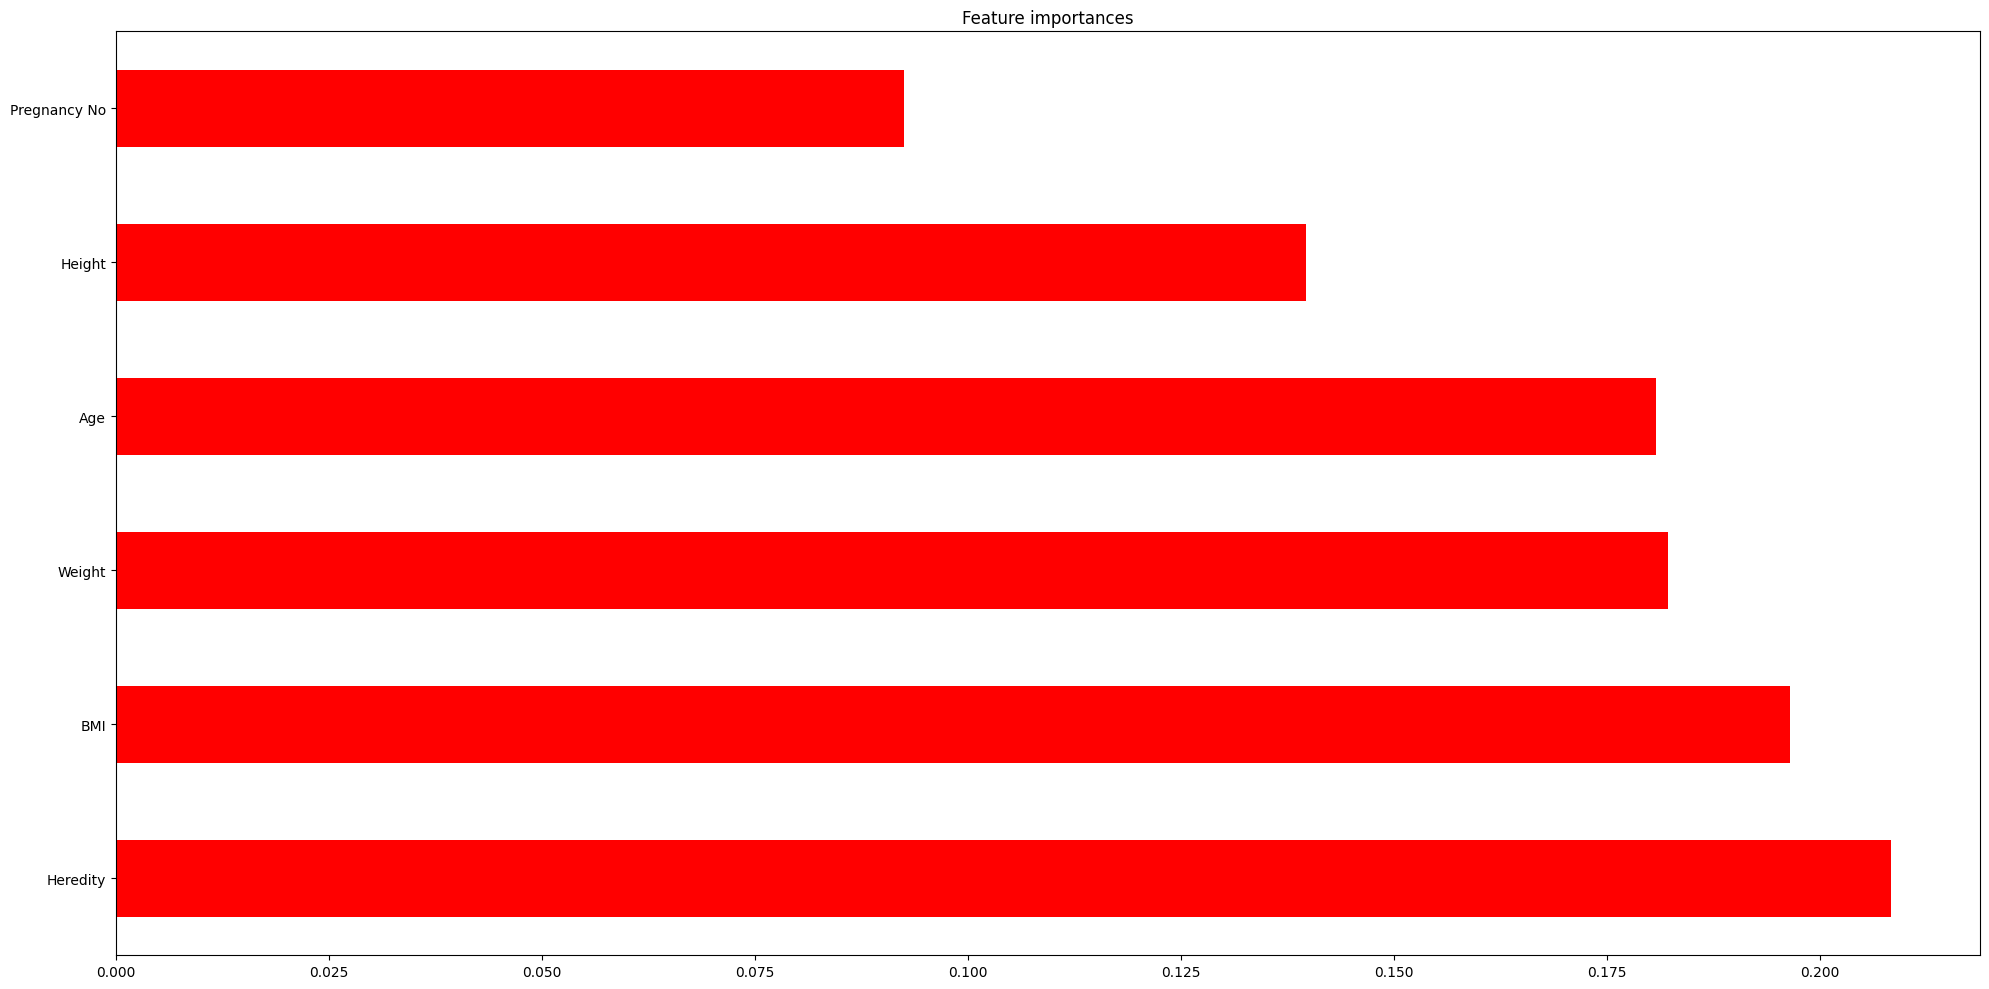

In [24]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
plt.title('Feature importances')
feat=pd.Series(ex.feature_importances_,index=X.columns)
feat.nlargest(15).plot(kind='barh', color="r", align="center")
plt.tight_layout()
plt.grid(False)
plt.show()

In [25]:
from sklearn.model_selection import train_test_split ,cross_val_score,RandomizedSearchCV
X_train ,X_test,y_train ,y_test =train_test_split(X,y,test_size =.2 , random_state=42 , stratify=y)

In [26]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)

In [27]:
from sklearn.linear_model import LogisticRegression ,SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from xgboost.sklearn import XGBClassifier

In [28]:
models = {'Logistic Regression': LogisticRegression(),
         'KNN': KNeighborsClassifier(),
         'Decision Tree': DecisionTreeClassifier(),
         'Random Forest': RandomForestClassifier(),
         'Gradient Boosting Classifier':GradientBoostingClassifier(),
         'Support Vector Machine': SVC(),
         'Stochastic Gradien Descent': SGDClassifier(),
         'Naive Bayes': GaussianNB(),
         'xgb Classifier': XGBClassifier()}

In [29]:
def fit_score(models, X_train, X_test, y_train, y_test):
    np.random.seed(42)
    model_scores = {}
    for name, model in models.items():
        model.fit(X_train, y_train)
        model_scores[name] = cross_val_score(model,
                                             X_test,
                                             y_test,
                                            scoring='accuracy',
                                            cv=3
                                            ).mean()

    return model_scores

In [30]:
model_scores = fit_score(models,X_train,X_test,y_train,y_test)

model_scores

{'Logistic Regression': 0.8149127445795875,
 'KNN': 0.7771901991891416,
 'Decision Tree': 0.7664375110170986,
 'Random Forest': 0.7826546800634585,
 'Gradient Boosting Classifier': 0.7881191609377755,
 'Support Vector Machine': 0.7768376520359599,
 'Stochastic Gradien Descent': 0.7989599858981139,
 'Naive Bayes': 0.7934073682355015,
 'xgb Classifier': 0.7932310946589105}

<Axes: >

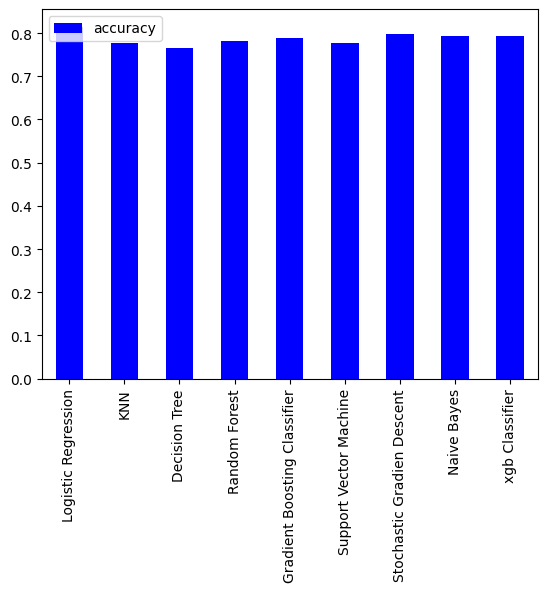

In [31]:
models = pd.DataFrame(model_scores, index=["accuracy"])
models.T.plot.bar(color="blue")

In [32]:
np.random.seed(42)
params = {"max_iter": [50,100,200, 300] ,
        'solver': ['lbfgs','liblinear','newton-cg','saga'],
        'penalty' :['l1', 'l2', 'elasticnet', None],}


lr = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=params,
                                cv=3,
                                n_iter=100,
                                verbose=1,
                              refit=True,
                                n_jobs=-1
                               )

lr.fit(X_train, y_train)

lr.best_params_

Fitting 3 folds for each of 64 candidates, totalling 192 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning:

The total space of parameters 64 is smaller than n_iter=100. Running 64 iterations. For exhaustive searches, use GridSearchCV.

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning:


84 fits failed out of a total of 192.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
12 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 116

{'solver': 'lbfgs', 'penalty': 'l2', 'max_iter': 50}

In [33]:
lr.best_estimator_

LogisticRegression(max_iter=50)

In [34]:
lr.best_score_

0.8637671462027434

In [35]:
lr.score(X_test, y_test)

0.8315217391304348

In [36]:
lr.score(X_test, y_test)

0.8315217391304348

In [37]:
model = LogisticRegression(solver= 'lbfgs', penalty= 'l2', max_iter= 50)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

<Axes: >

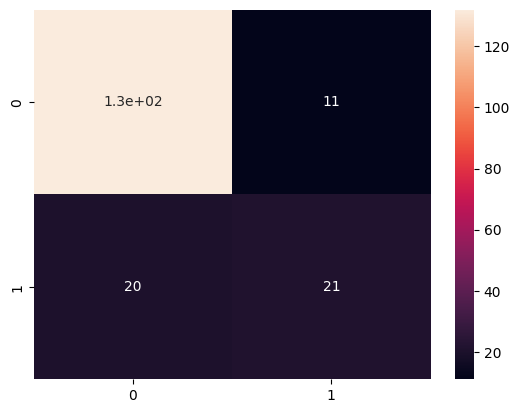

In [38]:
from sklearn.metrics import confusion_matrix, classification_report
sns.heatmap(pd.DataFrame(confusion_matrix(y_test,y_pred)) , annot=True)

In [39]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.87      0.92      0.89       143
           1       0.66      0.51      0.58        41

    accuracy                           0.83       184
   macro avg       0.76      0.72      0.74       184
weighted avg       0.82      0.83      0.82       184



In [40]:
from tensorflow import keras
callback = keras.callbacks.EarlyStopping(monitor='loss', patience=30)

In [41]:
Model=keras.Sequential([keras.layers.Dense(64,activation='relu'),
                        keras.layers.Dense(32,activation='relu')
                        ,keras.layers.Dense(16,activation='relu'),
                           keras.layers.Dense(1,activation='sigmoid')])

In [42]:
Model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['acc'])
history=Model.fit(X_train,y_train,epochs=100,batch_size=16,validation_split=0.3,callbacks=[callback],verbose=1)

Epoch 1/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - acc: 0.8091 - loss: 0.6075 - val_acc: 0.7692 - val_loss: 0.4855
Epoch 2/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - acc: 0.8256 - loss: 0.4412 - val_acc: 0.8281 - val_loss: 0.4111
Epoch 3/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - acc: 0.8746 - loss: 0.3437 - val_acc: 0.8462 - val_loss: 0.3946
Epoch 4/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - acc: 0.8673 - loss: 0.3272 - val_acc: 0.8507 - val_loss: 0.3938
Epoch 5/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - acc: 0.8974 - loss: 0.3071 - val_acc: 0.8507 - val_loss: 0.3873
Epoch 6/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - acc: 0.8757 - loss: 0.3213 - val_acc: 0.8507 - val_loss: 0.4031
Epoch 7/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - acc: 0.8809 - loss: 0.3040 - val_acc: 0.8507 - val_loss: 0.3991
Epoch 8/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - acc: 0.8716 - loss: 0.3112 - val_acc: 0.8462 - val_loss: 0.4057
Epoch 9/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - acc: 0.8661

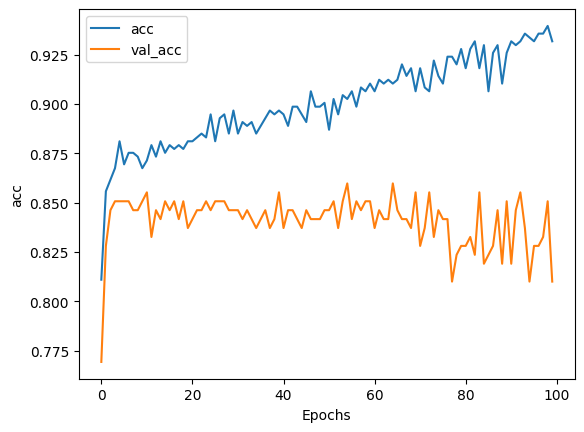

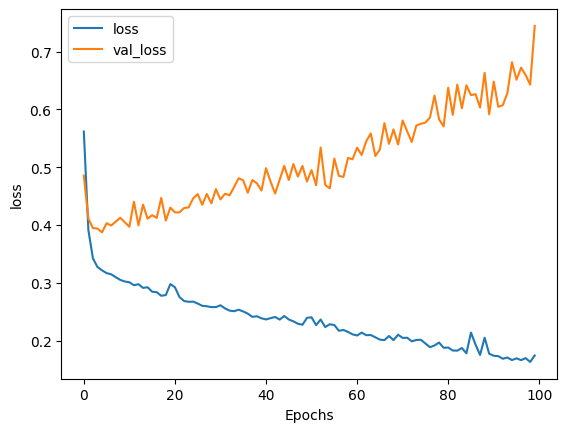

In [43]:
def plot_graphs(history,string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()
  
plot_graphs(history, "acc")
plot_graphs(history, "loss")

In [44]:
y_pred_deep=Model.predict(X_test)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


<Axes: >

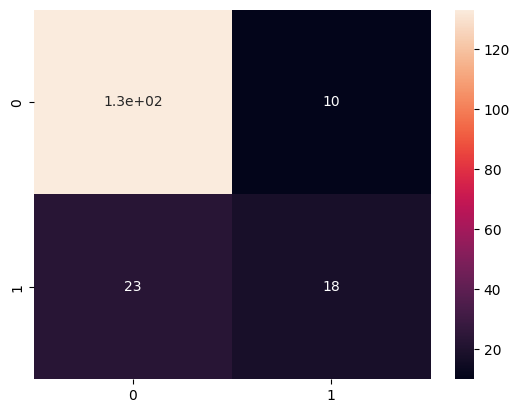

In [45]:
sns.heatmap(pd.DataFrame(confusion_matrix(y_test,y_pred_deep.round())) , annot=True)

In [46]:
print(classification_report(y_test, y_pred_deep.round()))

              precision    recall  f1-score   support

           0       0.85      0.93      0.89       143
           1       0.64      0.44      0.52        41

    accuracy                           0.82       184
   macro avg       0.75      0.68      0.71       184
weighted avg       0.81      0.82      0.81       184

